In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [78]:
data = pd.read_csv('training/allcharlinepairs.csv')

Check data basic info

In [79]:
data.shape

(174691, 10)

In [80]:
data.head()

,storyid,linenum,char,freerespworkerid,context,sentence,action,affected,motivation,emotion
0,83419922-be06-46c7-81b6-d3a9d8b8008e,1,Bill,ann0,NaN,Bill was very hungry in class.,no,yes,"[""none""]","[""famished""]"
1,83419922-be06-46c7-81b6-d3a9d8b8008e,1,Bill,ann1,NaN,Bill was very hungry in class.,no,yes,"[""none""]","[""perturbed""]"
2,83419922-be06-46c7-81b6-d3a9d8b8008e,2,Bill,ann0,Bill was very hungry in class.,"However, lunch was an hour away.",no,yes,"[""none""]","[""sad""]"
3,83419922-be06-46c7-81b6-d3a9d8b8008e,2,Bill,ann1,Bill was very hungry in class.,"However, lunch was an hour away.",no,yes,"[""none""]","[""irritated"", ""weak"", ""frustrated""]"
4,83419922-be06-46c7-81b6-d3a9d8b8008e,3,Bill,ann0,"Bill was very hungry in class.|However, lunch ...",He just couldn't take it.,no,yes,"[""none""]","[""hungry"", ""anxious""]"


In [81]:
data.dtypes

storyid             object
linenum              int64
char                object
freerespworkerid    object
context             object
sentence            object
action              object
affected            object
motivation          object
emotion             object
dtype: object

In [82]:
# affected == 'no' <--> emotion == 'none'
data[data['affected'] == 'no']

,storyid,linenum,char,freerespworkerid,context,sentence,action,affected,motivation,emotion
11,555fd976-f554-465d-97c5-beed0139e9fb,1,Ian,ann1,NaN,Ian bought some seedlings to plant in his new ...,no,no,"[""none""]","[""none""]"
14,555fd976-f554-465d-97c5-beed0139e9fb,3,Ian,ann0,Ian bought some seedlings to plant in his new ...,The seedlings sat around much longer than they...,no,no,"[""none""]","[""none""]"
28,68e004a7-7b62-4fdd-ba82-1af1e8a9c23a,3,Allie,ann1,Allie was exhausted earlier.|She had wanted sl...,Now all the sudden she was not tired.,no,no,"[""none""]","[""none""]"
69,66b45396-1ac5-451e-9dee-f69e1d94722c,1,His son,none,NaN,Alan was the coach of a little league baseball...,no,no,"[""none""]","[""none""]"
73,66b45396-1ac5-451e-9dee-f69e1d94722c,1,Team,ann1,NaN,Alan was the coach of a little league baseball...,no,no,"[""none""]","[""none""]"
...,...,...,...,...,...,...,...,...,...,...
174682,b9bdc7c8-f058-4d1f-8dc6-9967e1107a6f,3,Dentist,none,Jessica like to drink energy drinks.|She drank...,She knew it was bad for her.,no,no,"[""none""]","[""none""]"
174684,b9bdc7c8-f058-4d1f-8dc6-9967e1107a6f,4,Dentist,ann0,Jessica like to drink energy drinks.|She drank...,She went to the dentist.,no,no,"[""none""]","[""none""]"
174685,b9bdc7c8-f058-4d1f-8dc6-9967e1107a6f,4,Dentist,ann1,Jessica like to drink energy drinks.|She drank...,She went to the dentist.,no,no,"[""none""]","[""none""]"
174688,b9bdc7c8-f058-4d1f-8dc6-9967e1107a6f,5,Dentist,ann0,Jessica like to drink energy drinks.|She drank...,She found out she had four cavities.,no,no,"[""none""]","[""none""]"


Distribution Check

In [83]:
# 习惯性改一下emotion的type, 后续好操作
data['emotion'] = [list(x.strip('[').strip(']').strip('\"').strip().split('", "')) for x in data['emotion']]

In [84]:
data

,storyid,linenum,char,freerespworkerid,context,sentence,action,affected,motivation,emotion
0,83419922-be06-46c7-81b6-d3a9d8b8008e,1,Bill,ann0,NaN,Bill was very hungry in class.,no,yes,"[""none""]",[famished]
1,83419922-be06-46c7-81b6-d3a9d8b8008e,1,Bill,ann1,NaN,Bill was very hungry in class.,no,yes,"[""none""]",[perturbed]
2,83419922-be06-46c7-81b6-d3a9d8b8008e,2,Bill,ann0,Bill was very hungry in class.,"However, lunch was an hour away.",no,yes,"[""none""]",[sad]
3,83419922-be06-46c7-81b6-d3a9d8b8008e,2,Bill,ann1,Bill was very hungry in class.,"However, lunch was an hour away.",no,yes,"[""none""]","[irritated, weak, frustrated]"
4,83419922-be06-46c7-81b6-d3a9d8b8008e,3,Bill,ann0,"Bill was very hungry in class.|However, lunch ...",He just couldn't take it.,no,yes,"[""none""]","[hungry, anxious]"
...,...,...,...,...,...,...,...,...,...,...
174686,b9bdc7c8-f058-4d1f-8dc6-9967e1107a6f,4,Jessica,ann0,Jessica like to drink energy drinks.|She drank...,She went to the dentist.,yes,yes,"[""to gain knowledge""]",[cautious]
174687,b9bdc7c8-f058-4d1f-8dc6-9967e1107a6f,4,Jessica,ann1,Jessica like to drink energy drinks.|She drank...,She went to the dentist.,yes,yes,"[""go with the doctor""]",[painful]
174688,b9bdc7c8-f058-4d1f-8dc6-9967e1107a6f,5,Dentist,ann0,Jessica like to drink energy drinks.|She drank...,She found out she had four cavities.,no,no,"[""none""]",[none]
174689,b9bdc7c8-f058-4d1f-8dc6-9967e1107a6f,5,Dentist,ann1,Jessica like to drink energy drinks.|She drank...,She found out she had four cavities.,no,yes,"[""none""]",[pity]


In [85]:
# 看一下内容状态
# count related
# 每个emotion x 在总字典X[x]中先记录一次freq，
# 然后同case下的其它情感yi \in {[y1, ..., yn], s.t. yi != x}记录一下freq到Y[x][yi]
emotionSum = {}
for dataRow in data['emotion']:
    for emotion in dataRow:
        if emotion in emotionSum:
            relatedEmotionDict = emotionSum.get(emotion)[1];
            for relatedEmotion in dataRow:
                if relatedEmotion != emotion:
                    relatedEmotionDict[relatedEmotion] = relatedEmotionDict.get(relatedEmotion, 0) + 1
            emotionSum[emotion] = [emotionSum.get(emotion)[0]+1, relatedEmotionDict];
        else:
            emotionSum[emotion] = [1, {}];
        

In [86]:
emotionDF = pd.DataFrame(list(zip(emotionSum.keys(),[x[0] for x in emotionSum.values()], 
                                  [list(x[1].keys())[0:5] for x in emotionSum.values()],[x[1] for x in emotionSum.values()])), 
                         columns = ['emotion','freq','highly related', 'all related info'])
emotionDFTop40 = emotionDF.sort_values(by=['freq'], na_position='first', ascending=False)[1:40]

In [87]:
emotionDF

,emotion,freq,highly related,all related info
0,famished,19,"[hungry, starving, full, starved, fatigued]","{'hungry': 3, 'starving': 1, 'full': 1, 'starv..."
1,perturbed,16,"[flustered, like i should probably learn to cl...","{'flustered': 1, 'like i should probably learn..."
2,sad,5128,"[overwhelmed, angry, regretful, disheartened, ...","{'overwhelmed': 2, 'angry': 156, 'regretful': ..."
3,irritated,769,"[inconvenienced, embarassed, disgusted, annoye...","{'inconvenienced': 1, 'embarassed': 1, 'disgus..."
4,weak,43,"[confused, rergretful, unenergetic, embarrasse...","{'confused': 1, 'rergretful': 1, 'unenergetic'..."
...,...,...,...,...
17738,"guilty, like the dog is gone because of someth...",1,[],{}
17739,crowded/packed-in,1,[],{}
17740,entitled to do that,1,[],{}
17741,unsure of the motive,1,[],{}


In [88]:
emotionDFTop40 # exclude none (freq = 46536)

,emotion,freq,highly related,all related info
23,happy,14712,"[proud, excited, the ancient of him family, pr...","{'proud': 466, 'excited': 1302, 'the ancient o..."
21,excited,7670,"[proud, happy, fun, panicked, morose]","{'proud': 243, 'happy': 1302, 'fun': 7, 'panic..."
34,proud,5255,"[happy, excited, pleased, successful, talented]","{'happy': 466, 'excited': 243, 'pleased': 96, ..."
2,sad,5128,"[overwhelmed, angry, regretful, disheartened, ...","{'overwhelmed': 2, 'angry': 156, 'regretful': ..."
48,annoyed,3247,"[frustrated, rushed, determined, hopeful, tired]","{'frustrated': 173, 'rushed': 6, 'determined':..."
99,upset,3073,"[happy, worry, angry, sad, not happy]","{'happy': 4, 'worry': 4, 'angry': 318, 'sad': ..."
43,disappointed,2726,"[annoyed, discouraged, embarrassed, frustrated...","{'annoyed': 57, 'discouraged': 36, 'embarrasse..."
19,angry,2532,"[sad, regretful, mad, anxious, frustrated]","{'sad': 155, 'regretful': 6, 'mad': 38, 'anxio..."
141,scared,2530,"[dead, regretful, nervous, anxious, entranced]","{'dead': 1, 'regretful': 5, 'nervous': 251, 'a..."
173,nervous,2316,"[awkward, scared, anxious, jealous, on edge]","{'awkward': 4, 'scared': 251, 'anxious': 151, ..."


In [89]:
def drawRelated(emotion, emotionSum, rangeNum, color):
    """
    @param emotion  the main emotion that everything 
                    in graph related to it
    @param emotionSum  all emotion info
    """
    plt.bar(list({k: v for k, v in sorted(emotionSum.get(emotion)[1].items(), key=lambda item: item[1], reverse= True)}.keys())[0:rangeNum], 
            list({k: v for k, v in sorted(emotionSum.get(emotion)[1].items(), key=lambda item: item[1], reverse= True)}.values())[0:rangeNum], 
            color = color)
    plt.title(emotion + " related to")
    plt.xticks(rotation=90)
    for emotion, freq in zip(list({k: v for k, v in sorted(emotionSum.get(emotion)[1].items(), key=lambda item: item[1], reverse= True)}.keys())[0:rangeNum],
                             list({k: v for k, v in sorted(emotionSum.get(emotion)[1].items(), key=lambda item: item[1], reverse= True)}.values())[0:rangeNum]):
        plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=4.5)


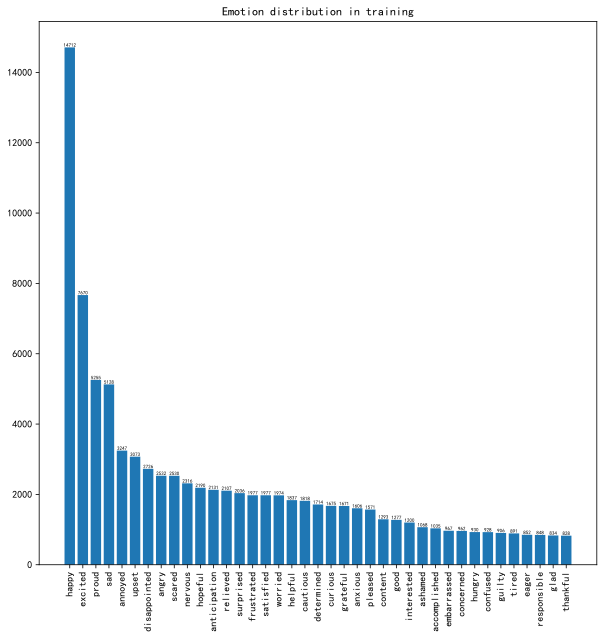

In [90]:
plt.rcParams['figure.figsize'] = (10.0, 10.0) 
plt.bar(emotionDFTop40['emotion'], emotionDFTop40['freq'])
plt.xticks(rotation=90) # 东西太多，旋转
plt.title("Emotion distribution in training")
for emotion, freq in zip(emotionDFTop40['emotion'], emotionDFTop40['freq']):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=5)
plt.show()

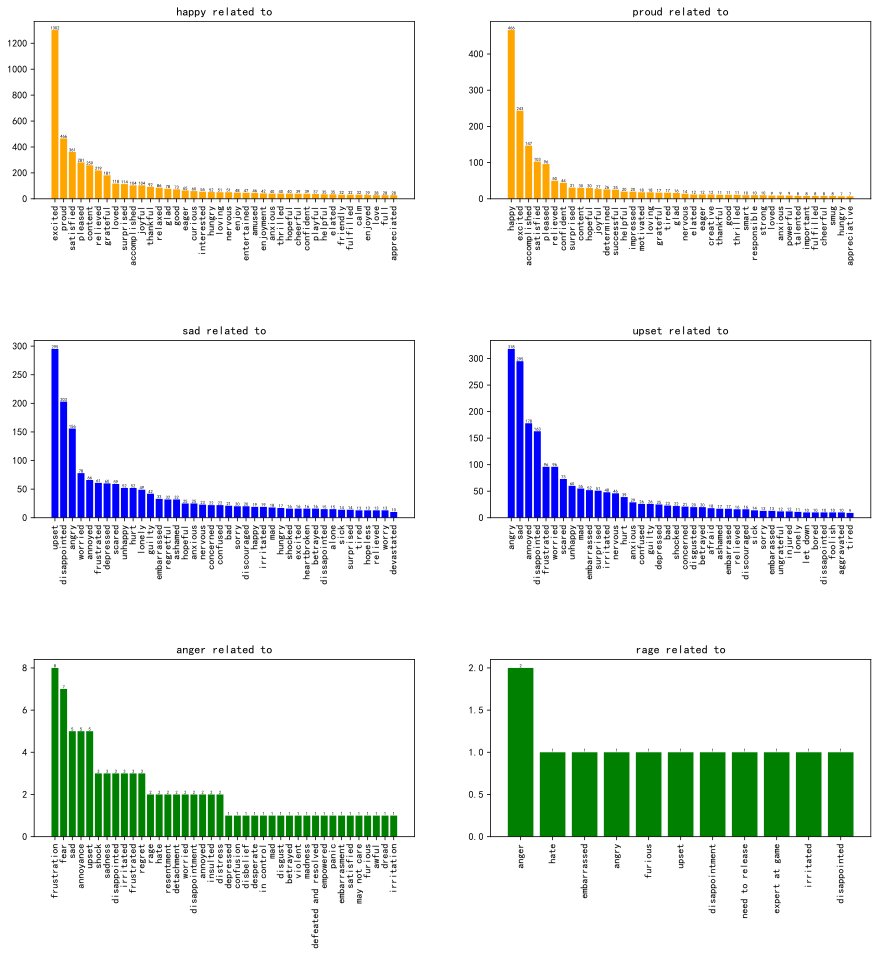

In [97]:
plt.rcParams['figure.figsize'] = (15.0, 15.0) 
plt.subplots_adjust(hspace=0.8, wspace=0.2)
plt.subplot(3,2,1)
drawRelated("happy", emotionSum, 40, 'orange')
plt.subplot(3,2,2)
drawRelated("proud", emotionSum, 40, 'orange')
plt.title("proud related to")
plt.subplot(3,2,3)
drawRelated('sad', emotionSum, 40, 'blue')
plt.subplot(3,2,4)
drawRelated('upset', emotionSum, 40, 'blue')
plt.subplot(3,2,5)
drawRelated('anger', emotionSum, 40, 'green')
plt.subplot(3,2,6)
drawRelated('rage', emotionSum, 40, 'green')
plt.savefig("majorEmotionRelation.svg")
plt.show()


# After analyzing

In [98]:
#-----------
# Data cleaning for dev dataset
#-----------

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use only for dictionary parsing...
import ast

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [99]:
devData = pd.read_csv('dev/emotion/allcharlinepairs-withDataCleaning-v2.csv')
testData = pd.read_csv('test/emotion/allcharlinepairs-withDataCleaning-v2.csv')

In [100]:
devData['emotion'] = [ast.literal_eval(x) for x in devData['emotion']]
devData['plutchik'] = [ast.literal_eval(x) for x in devData['plutchik']]
testData['emotion'] = [ast.literal_eval(x) for x in testData['emotion']]
testData['plutchik'] = [ast.literal_eval(x) for x in testData['plutchik']]

Check distribution of each emotion in plutchik model

In [101]:
devFreqCount = {'joy' : 0, 'trust' : 0, 'fear' : 0, 'surprise' : 0, 'sadness' : 0, 'disgust' : 0, 'anger' : 0, 'anticipation' : 0}
testFreqCount = {'joy' : 0, 'trust' : 0, 'fear' : 0, 'surprise' : 0, 'sadness' : 0, 'disgust' : 0, 'anger' : 0, 'anticipation' : 0}
testWeightTotalCount = {'joy' : 0, 'trust' : 0, 'fear' : 0, 'surprise' : 0, 'sadness' : 0, 'disgust' : 0, 'anger' : 0, 'anticipation' : 0}
devWeightTotalCount = {'joy' : 0, 'trust' : 0, 'fear' : 0, 'surprise' : 0, 'sadness' : 0, 'disgust' : 0, 'anger' : 0, 'anticipation' : 0}
for index, row in devData.iterrows():
    for key, value in row['plutchik'].items():
        if value != 0: 
            devFreqCount[key] += 1
            devWeightTotalCount[key] += value
    print("\r", end="")
    print("1. Dev Plutchik -> start counting, current progress: {}/{} ".format(index+1, devData.shape[0]), end="")
    
for index, row in testData.iterrows():
    for key, value in row['plutchik'].items():
        if value != 0: 
            testFreqCount[key] += 1
            testWeightTotalCount[key] += value
    print("\r", end="")
    print("2. Test Plutchik -> start counting, current progress: {}/{} ".format(index+1, testData.shape[0]), end="")

2. Test Plutchik -> start counting, current progress: 11129/11129 

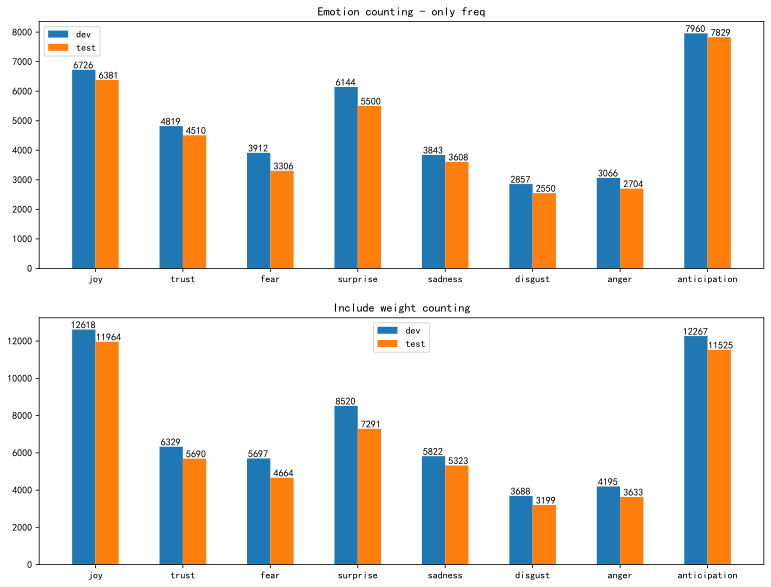

In [209]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13.0, 10.0) 

plt.subplot(2,1,1)
size = len(devFreqCount.keys())
x = np.arange(size)
total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x - width/2, list(devFreqCount.values()), width=width, label='dev')
plt.bar(x + width/2, list(testFreqCount.values()), width=width, label='test')
plt.xticks(x, devFreqCount.keys())
plt.title("Emotion counting - only freq")
for emotion, freq in zip(range(len(devFreqCount.keys())), devFreqCount.values()):
        plt.text(emotion - width - 0.14, freq, freq, ha='center', va='bottom', fontsize=10)
for emotion, freq in zip(range(len(testFreqCount.keys())), testFreqCount.values()):
        plt.text(emotion + width/2 - 0.25, freq, freq, ha='center', va='bottom', fontsize=10)
plt.legend()
    
plt.subplot(2,1,2)
plt.bar(x - width/2, list(devWeightTotalCount.values()), width=width, label='dev')
plt.bar(x + width/2, list(testWeightTotalCount.values()), width=width, label='test')
plt.xticks(x, devFreqCount.keys())
plt.title("Include weight counting")
for emotion, freq in zip(range(len(devWeightTotalCount.keys())), devWeightTotalCount.values()):
        plt.text(emotion - width - 0.14, freq, freq, ha='center', va='bottom', fontsize=10)
for emotion, freq in zip(range(len(testWeightTotalCount.keys())), testWeightTotalCount.values()):
        plt.text(emotion + width/2 - 0.25, freq, freq, ha='center', va='bottom', fontsize=10)
plt.legend()
plt.show()

In [145]:
len(np.random.random(size))

8

[6726, 4819, 3912, 6144, 3843, 2857, 3066, 7960]